In [202]:
from xgboost import XGBRegressor
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import cross_val_score

In [103]:
from sklearn.metrics import r2_score

In [32]:
import numpy as np

In [27]:
from scipy.stats import randint

In [3]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = ['auc',  'ams@0']

In [76]:
X_advanced='../data/pkl/X_PREPROC_ADVANCED_TEAM_ALL'
y_advanced='../data/pkl/y_ADVANCED_TEAM_ALL'

In [181]:
def make_baseline_lasso(X_path, y_path, alpha=0.5):
    
    '''scikit learn lasso regression, returns r2score, model, X_train, X_test, y_train, y_test'''
    
    X = pd.read_pickle(X_path)
    y = pd.read_pickle(y_path)

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

    clf = Lasso(alpha)
    clf.fit(X_train, y_train)

    scores = cross_val_score(clf, X_train, y_train, cv=5)

    return (np.mean(scores), clf, X_train, X_test, y_train, y_test)

def make_permutations(model, X_test, y_test, repeats=30, random_state=None):
    r_list = []
    r = permutation_importance(clf, X_test, y_test,n_repeats=30,random_state=0)
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            r_list.append(f"{X.columns[i]}"
                   f"{r.importances_mean[i]:.3f}"
                   f" +/- {r.importances_std[i]:.3f}")
    return r_list

def make_team_xgboost(X_path, y_path, n_iters):
    
    '''XG boost team based, WARNING THIS XGBOOST REQUIRES CATEGORICAL DATA TO NOT BE OHE;
    Returns the rmse, xg_model, X_train, X_test, y_train, y_test'''
    
    df_train = pd.read_pickle("../data/pkl/X_ADV_XGBOOST_TEAM_ALL")
    df_train["TEAM_ABBREVIATION_h"] = df_train["TEAM_ABBREVIATION_h"].astype("category")
    df_train["TEAM_ABBREVIATION_a"] = df_train["TEAM_ABBREVIATION_a"].astype("category")
    df_target = pd.read_pickle("../data/pkl/y_ADV_XGBOOST_TEAM_ALL")
    X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, random_state=0, test_size=0.3)
    dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
    dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)
    params = {"objective": "reg:squarederror", "tree_method": "hist"}
    evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
    xg_model = xgb.train( params=params,dtrain=dtrain_reg,num_boost_round=n_iters, evals=evals, verbose_eval=False)
    
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return xg_model

SyntaxError: incomplete input (3070079718.py, line 29)

In [105]:
r2_score(y_test, np.round(model.predict(X_test)))

0.7596077869486921

In [96]:
score_mean, model, X_train, X_test, y_train, y_test = make_baseline_lasso(X_advanced, y_advanced, alpha=0.5)

In [99]:
make_permutations(model, X_test, y_test, repeats=30, random_state=0)

['NET_RATING_h0.379 +/- 0.012',
 'DEF_RATING_h0.275 +/- 0.007',
 'OFF_RATING_h0.182 +/- 0.006',
 'NET_RATING_a0.002 +/- 0.000']

In [313]:
df_train = pd.read_pickle("../data/pkl/X_PREPROC_ADVANCED_TEAM_ALL")
# df_train["TEAM_ABBREVIATION_h"] = df_train["TEAM_ABBREVIATION_h"].astype("category")
# df_train["TEAM_ABBREVIATION_a"] = df_train["TEAM_ABBREVIATION_a"].astype("category")
columns_drop = ['OFF_RATING_h',
 'DEF_RATING_h',
 'NET_RATING_h',
 'AST_PCT_h',
 'AST_TOV_h',
 'OREB_PCT_h',
 'DREB_PCT_h',
 'REB_PCT_h',
 'TM_TOV_PCT_h',
 'EFG_PCT_h',
 'TS_PCT_h',
 'PACE_h',
 'POSS_h','OFF_RATING_a',
 'DEF_RATING_a',
 'NET_RATING_a',
 'AST_PCT_a',
 'AST_TOV_a',
 'OREB_PCT_a',
 'DREB_PCT_a',
 'REB_PCT_a',
 'TM_TOV_PCT_a',
 'EFG_PCT_a',
 'TS_PCT_a',
 'PACE_a',
 'POSS_a']
df_train = df_train.drop(columns_drop, axis=1)
df_target = pd.read_pickle("../data/pkl/y_ADVANCED_TEAM_ALL")
X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, random_state=0, test_size=0.3)

In [314]:
X_train.columns

Index(['OFF_RATING_Roll_mean_h', 'DEF_RATING_Roll_mean_h',
       'NET_RATING_Roll_mean_h', 'AST_PCT_Roll_mean_h', 'AST_TOV_Roll_mean_h',
       'OREB_PCT_Roll_mean_h', 'DREB_PCT_Roll_mean_h', 'REB_PCT_Roll_mean_h',
       'TM_TOV_PCT_Roll_mean_h', 'EFG_PCT_Roll_mean_h',
       ...
       'OKC_a', 'ORL_a', 'PHI_a', 'PHX_a', 'POR_a', 'SAC_a', 'SAS_a', 'TOR_a',
       'UTA_a', 'WAS_a'],
      dtype='object', length=138)

In [315]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)

dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [440]:
params = {'n_estimators': 600, 'max_depth': 20, 'learning_rate': 0.04350000000000002, 'subsample':0.2, 'gamma': 0.3, 'max_leaves':2}
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

In [446]:
n_iter_search = 500
#reg = XGBRegressor(nthread=-1)
xg_model = XGBRegressor(subsample= 0.39, reg_lambda= 0.02829999999999995,reg_alpha=0.03329999999999998, objective= 'reg:pseudohubererror', n_estimators= 647, max_depth=32, 
                        learning_rate = 0.021399999999999992, huber_slope=4.5600000000000005, n_jobs=-1)
# random_search = RandomizedSearchCV(reg, param_distributions=params,
#                                    n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error', n_jobs=)

In [447]:
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None,
             huber_slope=4.5600000000000005, importance_type=None,
             interaction_constraints=None, learning_rate=0.021399999999999992,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=32, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=647, n_jobs=-1, num_parallel_tree=None,
             objective='reg:pseudohubererror', ...)

In [448]:
cross_val_score(xg_model, X_train, y_train, cv=5)

array([0.38533494, 0.44817289, 0.38687145, 0.39593415, 0.48936437])

In [449]:
ft_importance = dict(zip(X_train.columns,xg_model.feature_importances_))
list(pd.DataFrame(dict(sorted(ft_importance.items(), key=lambda item: item[1], reverse=True)), index=[0]).columns)

['CHA_h',
 'NET_RATING_Roll_median_a',
 'NET_RATING_Roll_median_h',
 'NET_RATING_Roll_mean_a',
 'NET_RATING_Roll_std_a',
 'HOU_a',
 'NET_RATING_Roll_std_h',
 'PHX_a',
 'SAS_h',
 'DEF_RATING_Roll_median_a',
 'DEF_RATING_Roll_std_a',
 'CHA_a',
 'ORL_h',
 'OFF_RATING_Roll_median_a',
 'PHX_h',
 'REB_PCT_Roll_median_a',
 'TS_PCT_Roll_mean_a',
 'GSW_a',
 'EFG_PCT_Roll_std_a',
 'AST_PCT_Roll_median_a',
 'NOP_a',
 'DAL_a',
 'UTA_h',
 'AST_TOV_Roll_median_a',
 'BKN_h',
 'EFG_PCT_Roll_mean_a',
 'TS_PCT_Roll_median_a',
 'BKN_a',
 'IND_a',
 'REB_PCT_Roll_mean_a',
 'AST_TOV_Roll_std_a',
 'PACE_Roll_mean_a',
 'OKC_h',
 'TM_TOV_PCT_Roll_median_a',
 'POSS_Roll_median_a',
 'EFG_PCT_Roll_median_a',
 'TS_PCT_Roll_std_h',
 'OREB_PCT_Roll_std_a',
 'DREB_PCT_Roll_std_a',
 'AST_TOV_Roll_mean_a',
 'PACE_Roll_std_a',
 'OFF_RATING_Roll_std_a',
 'EFG_PCT_Roll_std_h',
 'CLE_h',
 'MIL_h',
 'TM_TOV_PCT_Roll_std_a',
 'AST_PCT_Roll_std_a',
 'REB_PCT_Roll_std_a',
 'DEN_a',
 'OREB_PCT_Roll_median_a',
 'REB_PCT_Roll_std

In [450]:
r2_score(y_test, np.round(xg_model.predict(X_test)))

0.43408692136419

In [451]:
r2_score(y_train, np.round(xg_model.predict(X_train)))

0.998790570791004

In [452]:
rmse = mean_squared_error(y_test, xg_model.predict(X_test), squared=False)

In [453]:
rmse

10.775873809564521

<Axes: ylabel='Count'>

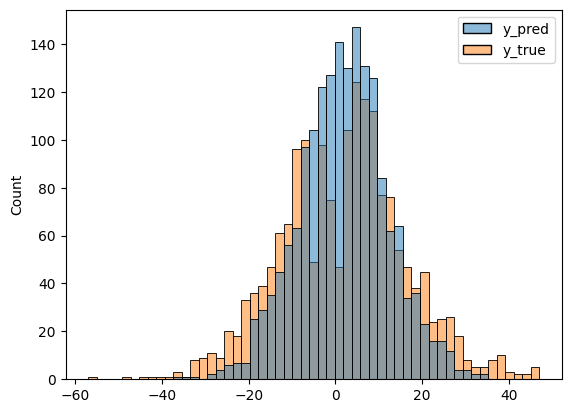

In [454]:
sns.histplot(pd.DataFrame({'y_pred':xg_model.predict(X_test), 'y_true':y_test}))

In [276]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          nthread=-1, num_parallel_tree=None,
                                          predictor=None, ...),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.1],
                                        'n_estimators': [500]},
                   scoring='neg_mean_squared_error')

In [277]:
best_random = random_search.best_estimator_

In [259]:
best_random.predict(X_test)

array([  2.1804829 ,   2.9207299 , -22.246914  , ...,  -0.10886419,
         2.3736324 ,   2.1483138 ], dtype=float32)

In [195]:
#predictions = xg_model.predict(dtest_reg)

In [260]:
r2_score(y_test, np.round(best_random.predict(X_test)))

0.47807273709081766

In [264]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, best_random.predict(X_test), squared=False)

In [265]:
rmse

10.342202199782951

In [266]:
import seaborn as sns

<Axes: ylabel='Count'>

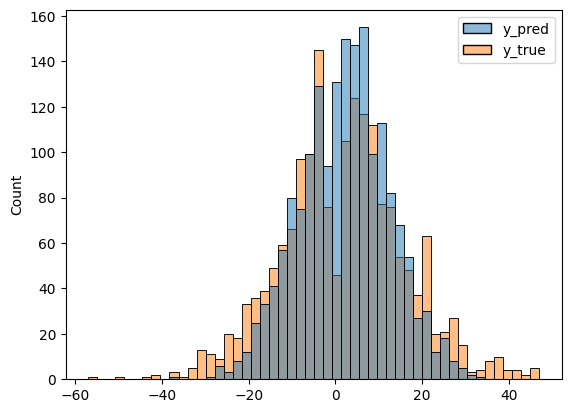

In [267]:
sns.histplot(pd.DataFrame({'y_pred':preds, 'y_true':y_test}))

In [ ]:
sns.scatterplot